# ASSOCIATION RULE LEARNING : APRIORI AND ECLAT ON THE GROCERIES DATA

In simple terms, association refers to the algorithm behind process of finding 'People who bought this, also bought...". Association rules are if/then statements that help uncover relationships between seemingly unrelated data in a relational database or other information repository. An example of an association rule would be "If a customer buys a dozen eggs, he is 80% likely to also purchase milk."Association rules are created by analyzing data for frequent if/then patterns and using the criteria support and confidence to identify the most important relationships. Support is an indication of how frequently the items appear in the database. Confidence indicates the number of times the if/then statements have been found to be true.

Here we are analysing the 'groceries' dataset taken from : http://www.salemmarafi.com/code/market-basket-analysis-with-r/comment-page-1/ containing bills of purchases/transactions made by various customers. The task is to find various associative rules so that the products bearing such rules can be placed close to each other,to optimize sales and increase revenue. No wonder you might always find the banana bread mix very close to the rack of bananas in your nearest grocery superstore !

The analysis is done in R. The package for Association Rule mining in R is 'arules'. Lets begin by installing/loading the package.

In [20]:
#install.packages('arules')
library(arules)

Now lets read in the dataset. For Association Rules, the 'arules' package requires the dataset to be input as a Sparse Matrix, i.e. a matrix of mainly zeros, which is done using 'read.transactions ( )'.'1' will indicate item purchased and '0' otherwise.

In [21]:
dataset = read.transactions('groceries.csv', sep = ',', rm.duplicates = TRUE)

Now print the summary 

In [2]:
summary(dataset)

transactions as itemMatrix in sparse format with
 9835 rows (elements/itemsets/transactions) and
 169 columns (items) and a density of 0.02609146 

most frequent items:
      whole milk other vegetables       rolls/buns             soda 
            2513             1903             1809             1715 
          yogurt          (Other) 
            1372            34055 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2159 1643 1299 1005  855  645  545  438  350  246  182  117   78   77   55   46 
  17   18   19   20   21   22   23   24   26   27   28   29   32 
  29   14   14    9   11    4    6    1    1    1    1    3    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   4.409   6.000  32.000 

includes extended item information - examples:
            labels
1 abrasive cleaner
2 artif. sweetener
3   baby cosmetics

As we see, the sparse matrix is created with 9835 transactions and 169 columns. The density of the sparse matrix is 2%

Now lets obtain a plot of the most 20 frequent items

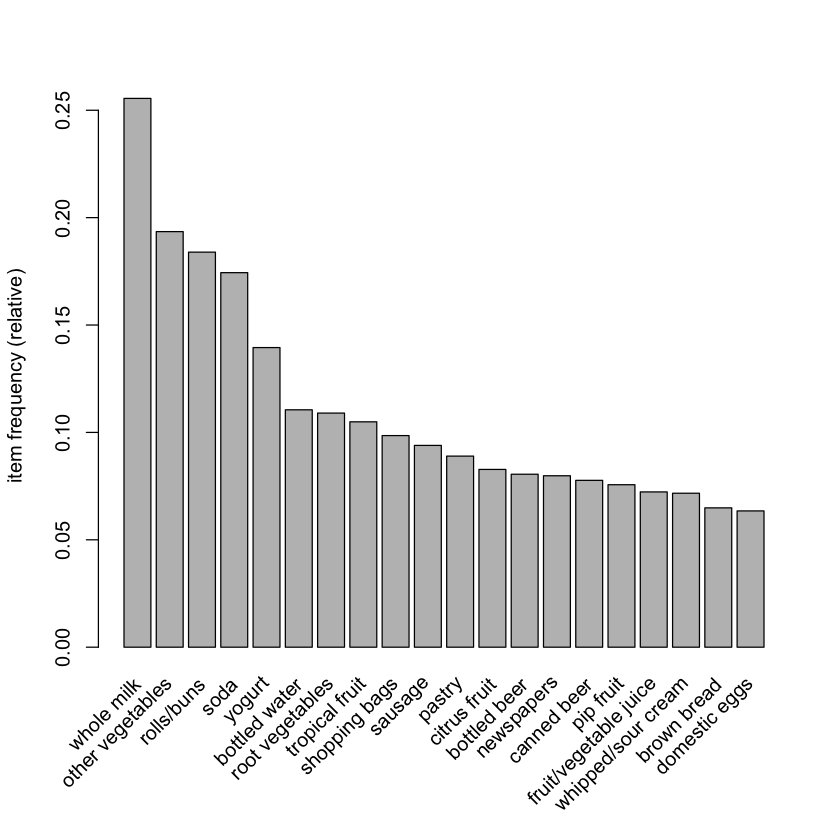

In [22]:
itemFrequencyPlot(dataset, topN = 20)

Observed that items such as 'whole milk', 'other vegetables' and 'rolls/buns' top the list of most frequent items

In [12]:
3*7/9835
4*7/9835

[1] 0.002135231

[1] 0.002846975

Lets now move on to training. The function to be used is 'apriori( )'. The function requires to input two important parameters, viz minimum support and confidence. We can input the value of minimum support such that the rules are formed with items occuring in atleast 3 transactions in a week. So,

\begin{align}
Support = (3*7)/9835 = 0.002\\
\end{align}

Similarly lets generate rules that are atleast 20 % true. i.e. a confidence of 0.2. We keep the values of Confidence reduced to generate rules.

In [23]:
# Training Apriori on the dataset
rules = apriori(data = dataset, parameter = list(support = 0.002, confidence = 0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 19 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [147 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [5112 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


A set of 5112 association rules are being formed with the above parameters. Lets visualize first 10 of them, using the inspect ( ) and lets sort them by 'lift'.

In [25]:
# Visualising the results
inspect(sort(rules, by = 'lift')[1:10])

     lhs                                           rhs                 
[1]  {Instant food products}                    => {hamburger meat}    
[2]  {flour,whole milk}                         => {sugar}             
[3]  {flour}                                    => {sugar}             
[4]  {hard cheese,whipped/sour cream}           => {butter}            
[5]  {popcorn}                                  => {salty snack}       
[6]  {butter,whipped/sour cream}                => {hard cheese}       
[7]  {processed cheese,whole milk}              => {white bread}       
[8]  {butter,hard cheese}                       => {whipped/sour cream}
[9]  {bottled water,root vegetables,whole milk} => {butter}            
[10] {processed cheese}                         => {white bread}       
     support     confidence lift     
[1]  0.003050330 0.3797468  11.421438
[2]  0.002846975 0.3373494   9.963457
[3]  0.004982206 0.2865497   8.463112
[4]  0.002033554 0.4545455   8.202669
[5]  0.002236909 0

The item 'Instant food products' are purchased together with the item 'hamburger meat' 37 % of cases.

The items 'flour' and 'whole milk' are purchased together with the item 'sugar' in 33 % of cases.

This way, 5112 rules are generated.

Now suppose we input the value of minimum support such that the rules are formed with items occuring in atleast 4 transactions in a week, Then

\begin{align}
Support = (4*7)/9835 = 0.003\\
\end{align}


In [26]:
rules = apriori(data = dataset, parameter = list(support = 0.003, confidence = 0.2))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5   0.003      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 29 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [136 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [2246 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


This time the rules are reduced to 2246, with a slight reduction in support.

In [27]:
# Visualising the results
inspect(sort(rules, by = 'lift')[1:10])

     lhs                        rhs                      support confidence      lift
[1]  {Instant food products} => {hamburger meat}     0.003050330  0.3797468 11.421438
[2]  {flour}                 => {sugar}              0.004982206  0.2865497  8.463112
[3]  {processed cheese}      => {white bread}        0.004168785  0.2515337  5.975445
[4]  {citrus fruit,                                                                  
      other vegetables,                                                              
      tropical fruit,                                                                
      whole milk}            => {root vegetables}    0.003152008  0.6326531  5.804238
[5]  {other vegetables,                                                              
      root vegetables,                                                               
      tropical fruit,                                                                
      whole milk}            => {citrus fruit}       0

A new set of associations are thus created.

Now lets try another algorithm, Eclat. This is much simpler than apriori in that it has only the support parameter. 

Eclat creates sets of items which are bought together. Use a minimum support of 0.003 and atleast two items in the rule.

In [30]:
# Training Eclat on the dataset
rules = eclat(data = dataset, parameter = list(support = 0.003, minlen = 2))

Eclat

parameter specification:
 tidLists support minlen maxlen            target   ext
    FALSE   0.003      2     10 frequent itemsets FALSE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 29 

create itemset ... 
set transactions ...[169 item(s), 9835 transaction(s)] done [0.01s].
sorting and recoding items ... [136 item(s)] done [0.00s].
creating sparse bit matrix ... [136 row(s), 9835 column(s)] done [0.00s].
writing  ... [2090 set(s)] done [0.04s].
Creating S4 object  ... done [0.00s].


In [29]:
# Visualising the results
inspect(sort(rules, by = 'support')[1:10])

     items                              support   
[1]  {other vegetables,whole milk}      0.07483477
[2]  {rolls/buns,whole milk}            0.05663447
[3]  {whole milk,yogurt}                0.05602440
[4]  {root vegetables,whole milk}       0.04890696
[5]  {other vegetables,root vegetables} 0.04738180
[6]  {other vegetables,yogurt}          0.04341637
[7]  {other vegetables,rolls/buns}      0.04260295
[8]  {tropical fruit,whole milk}        0.04229792
[9]  {soda,whole milk}                  0.04006101
[10] {rolls/buns,soda}                  0.03833249


2090 rules are generated as above. Items 'other vegetables','whole milk' are purchased together most number of times, followed by 'rolls/buns' and 'whole milk', 'whole milk' and 'yogurt' and so on.

## Concluding Remarks

1. apriori algorithm generated 5112 rules. The item 'Instant food products' are purchased together with the item 'hamburger meat' 37 % of cases. The items 'flour' and 'whole milk' are purchased together with the item 'sugar' in 33 % of cases.
2. Eclat algorithm generated 2090 rules, Items 'other vegetables','whole milk' are purchased together most number of times. Eclat is much simpler in nature.
